In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [12]:
df=pd.read_csv("customer.csv")

In [5]:
df.head()

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2
2,708084558,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2
3,708085458,38,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1
4,708086958,48,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1


In [7]:
df.tail()

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
10103,827695683,44,M,3,Graduate,Single,NV,91750,yes,yes,yes,unknown,Selfemployeed,44903,5
10104,827703258,48,M,3,Unknown,Unknown,TX,91750,no,yes,no,cellular,Selfemployeed,73655,3
10105,827712108,47,M,4,Graduate,Married,NY,91750,yes,no,no,cellular,Selfemployeed,62287,3
10106,827888433,42,F,3,Graduate,Married,TX,91750,no,no,no,cellular,White-collar,21390,4
10107,827890758,47,M,4,High School,Married,NY,91750,no,yes,no,cellular,Selfemployeed,42187,4


In [9]:
df.shape

(10108, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Client_Num               10108 non-null  int64 
 1   Customer_Age             10108 non-null  int64 
 2   Gender                   10108 non-null  object
 3   Dependent_Count          10108 non-null  int64 
 4   Education_Level          10108 non-null  object
 5   Marital_Status           10108 non-null  object
 6   state_cd                 10108 non-null  object
 7   Zipcode                  10108 non-null  int64 
 8   Car_Owner                10108 non-null  object
 9   House_Owner              10108 non-null  object
 10  Personal_loan            10108 non-null  object
 11  contact                  10108 non-null  object
 12  Customer_Job             10108 non-null  object
 13  Income                   10108 non-null  int64 
 14  Cust_Satisfaction_Score  10108 non-nul

In [13]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***" * 10)


Gender
F    5880
M    4228
Name: count, dtype: int64
******************************
Education_Level
Graduate         4134
High School      2009
Unknown          1515
Uneducated       1483
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
******************************
Marital_Status
Married    5128
Single     4236
Unknown     744
Name: count, dtype: int64
******************************
state_cd
CA    2468
TX    2394
NY    2270
FL    1711
NJ     716
MI      63
IL      58
NV      56
IA      47
AK      31
WA      30
MA      28
VA      27
UT      27
MN      22
MO      20
PA      18
SC      17
GA      16
CT      14
NM      12
AR      11
OH      11
AZ      10
HI       9
CO       9
NE       8
OR       5
Name: count, dtype: int64
******************************
Car_Owner
no     6044
yes    4064
Name: count, dtype: int64
******************************
House_Owner
no     5390
yes    4718
Name: count, dtype: int64
******************************
Personal_loan
no     8822
yes    

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Client_Num,10108.0,7.390104e+08,3.673623e+07,708082083.0,7.130267e+08,717903745.5,7.727989e+08,827890758.0
Customer_Age,10108.0,4.627444e+01,8.087876e+00,21.0,4.100000e+01,46.0,5.200000e+01,73.0
Dependent_Count,10108.0,2.345370e+00,1.299486e+00,0.0,1.000000e+00,2.0,3.000000e+00,5.0
Zipcode,10108.0,9.166307e+04,1.693094e+03,53010.0,9.175000e+04,91750.0,9.175000e+04,99504.0
Income,10108.0,5.697610e+04,4.618372e+04,1250.0,2.263575e+04,44768.5,7.639275e+04,239791.0
Cust_Satisfaction_Score,10108.0,3.189256e+00,1.263101e+00,1.0,2.000000e+00,3.0,4.000000e+00,5.0


In [17]:
df.describe(include="object")

,Gender,Education_Level,Marital_Status,state_cd,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job
count,10108,10108,10108,10108,10108,10108,10108,10108,10108
unique,2,6,3,28,2,2,2,3,6
top,F,Graduate,Married,CA,no,no,no,cellular,Selfemployeed
freq,5880,4134,5128,2468,6044,5390,8822,7457,2575


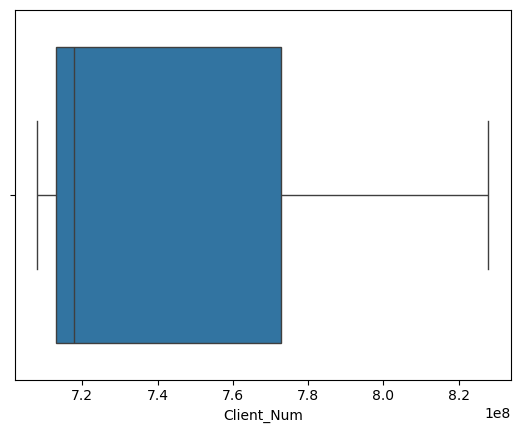

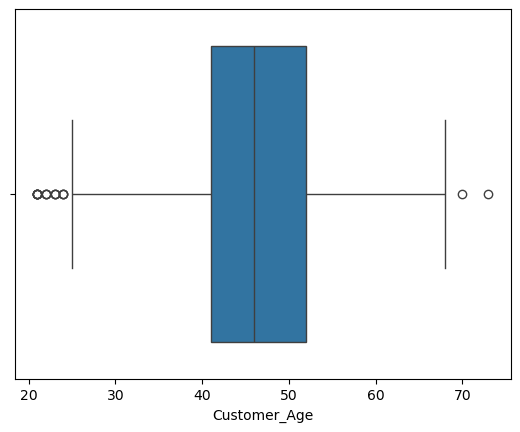

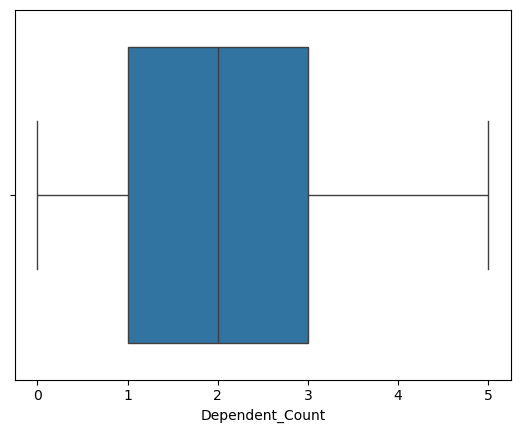

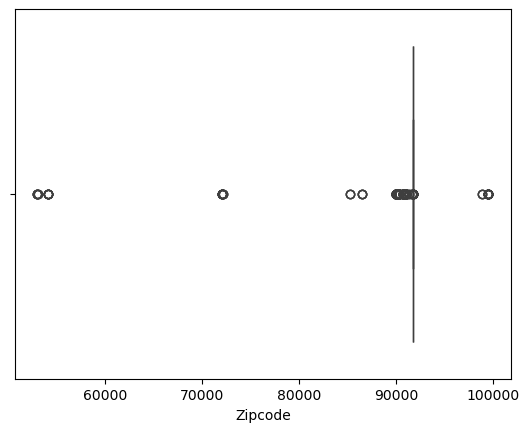

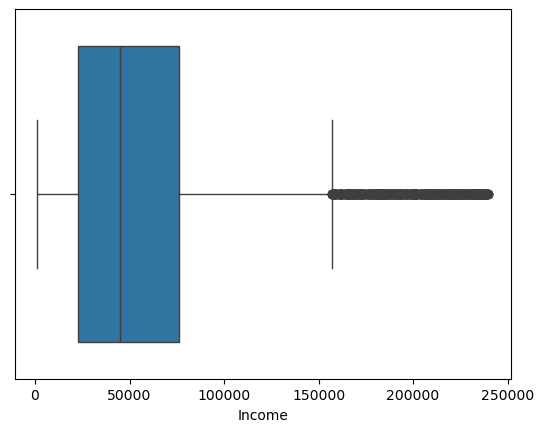

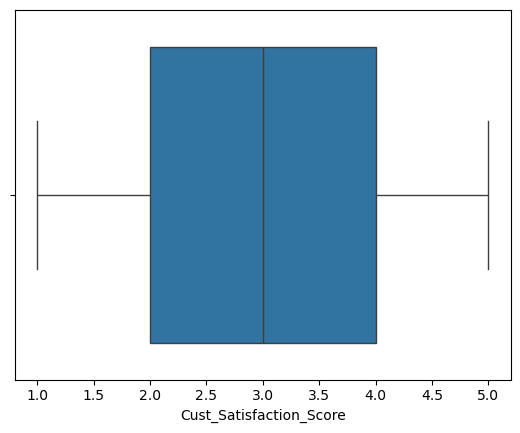

In [19]:
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

In [53]:
# Replace 'Unknown' values in specific columns with NaN and handle missing data
columns_with_unknown = ['Education_Level', 'Marital_Status', 'contact']
df[columns_with_unknown] = df[columns_with_unknown].replace('Unknown', np.nan)
df['contact'] = df['contact'].str.strip().replace(['Unknown', 'unknown', 'UNKNOWN'], np.nan)

In [23]:
print(df.isnull().sum()) 

Client_Num                    0
Customer_Age                  0
Gender                        0
Dependent_Count               0
Education_Level            1515
Marital_Status              744
state_cd                      0
Zipcode                       0
Car_Owner                     0
House_Owner                   0
Personal_loan                 0
contact                    1947
Customer_Job                  0
Income                        0
Cust_Satisfaction_Score       0
dtype: int64


In [25]:
df['Education_Level'].fillna(df['Education_Level'].mode()[0], inplace=True)
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)
df['contact'].fillna(df['contact'].mode()[0], inplace=True)

In [27]:
print(df.isnull().sum()) 

Client_Num                 0
Customer_Age               0
Gender                     0
Dependent_Count            0
Education_Level            0
Marital_Status             0
state_cd                   0
Zipcode                    0
Car_Owner                  0
House_Owner                0
Personal_loan              0
contact                    0
Customer_Job               0
Income                     0
Cust_Satisfaction_Score    0
dtype: int64


In [29]:
df.duplicated().sum()

0

In [15]:
def bound(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    return lb,ub

In [17]:
bound(df['Customer_Age'])

(24.5, 68.5)

In [55]:
# Handling outliers in 'Customer_Age'
for i in ['Customer_Age']:
    lb,ub = bound(df[i])
    df[i]=np.where(df[i]<lb,lb,df[i])
    df[i]=np.where(df[i]>ub,ub,df[i])


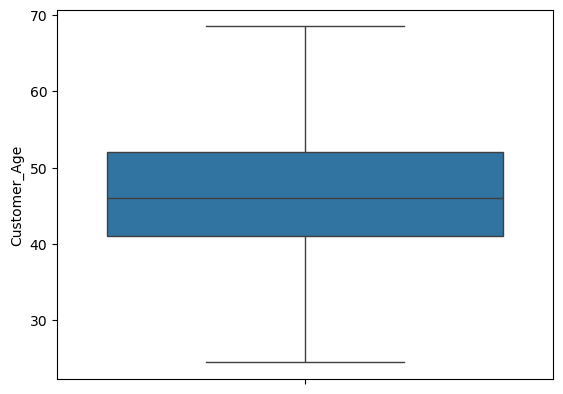

In [21]:
for i in ['Customer_Age']:
    sns.boxplot(df[i])
    plt.show()

In [47]:
df.columns

Index(['Client_Num', 'Customer_Age', 'Gender', 'Dependent_Count',
       'Education_Level', 'Marital_Status', 'state_cd', 'Zipcode', 'Car_Owner',
       'House_Owner', 'Personal_loan', 'contact', 'Customer_Job', 'Income',
       'Cust_Satisfaction_Score'],
      dtype='object')

In [49]:
df.drop_duplicates()

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,24.5,F,1,Uneducated,Single,FL,91750,no,yes,no,cellular,Businessman,157028.25,3
1,708083283,62.0,F,0,Graduate,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225.00,2
2,708084558,32.0,F,1,Graduate,Married,NJ,91750,yes,no,no,cellular,Selfemployeed,14235.00,2
3,708085458,38.0,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683.00,1
4,708086958,48.0,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10103,827695683,44.0,M,3,Graduate,Single,NV,91750,yes,yes,yes,cellular,Selfemployeed,44903.00,5
10104,827703258,48.0,M,3,Graduate,Married,TX,91750,no,yes,no,cellular,Selfemployeed,73655.00,3
10105,827712108,47.0,M,4,Graduate,Married,NY,91750,yes,no,no,cellular,Selfemployeed,62287.00,3
10106,827888433,42.0,F,3,Graduate,Married,TX,91750,no,no,no,cellular,White-collar,21390.00,4


In [23]:
# Drop unnecessary columns
df.drop(['Client_Num', 'state_cd', 'Zipcode', 'Cust_Satisfaction_Score'], axis=1, inplace=True)

In [35]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Education_Level', 'Marital_Status', 'Customer_Job'], drop_first=True)

In [37]:
# Label Encoding for binary and ordinal features
le = LabelEncoder()
df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])
df_encoded['Car_Owner'] = le.fit_transform(df_encoded['Car_Owner'])
df_encoded['House_Owner'] = le.fit_transform(df_encoded['House_Owner'])
df_encoded['contact'] = le.fit_transform(df_encoded['contact'])
df_encoded['Personal_loan'] = le.fit_transform(df_encoded['Personal_loan'])


In [39]:
df_encoded.head()

,Customer_Age,Gender,Dependent_Count,Car_Owner,House_Owner,Personal_loan,contact,Income,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Single,Marital_Status_Unknown,Customer_Job_Businessman,Customer_Job_Govt,Customer_Job_Retirees,Customer_Job_Selfemployeed,Customer_Job_White-collar
0,24.5,0,1,0,1,0,2,202326,False,False,False,True,False,True,False,True,False,False,False,False
1,62.0,0,0,0,0,0,0,5225,False,False,False,False,True,False,False,False,False,False,True,False
2,32.0,0,1,1,0,0,2,14235,False,False,False,False,True,False,False,False,False,False,True,False
3,38.0,1,2,0,0,0,0,45683,False,False,False,True,False,True,False,False,False,False,False,False
4,48.0,1,4,1,1,0,0,59279,True,False,False,False,False,True,False,True,False,False,False,False


In [41]:
features = df_encoded.drop('Income', axis=1)
target = df_encoded['Income']

In [43]:
print(f"Features shape: {features.shape}")
print(f"Target shape: {target.shape}")

Features shape: (10108, 19)
Target shape: (10108,)


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = SVR(kernel='rbf') 
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")

R² Score: -0.0710
MAE: 33105.0808
MSE: 2300610044.0383
